In [ ]:
../satellite-images/Namibia.jpg

## TESTY GAUSSA

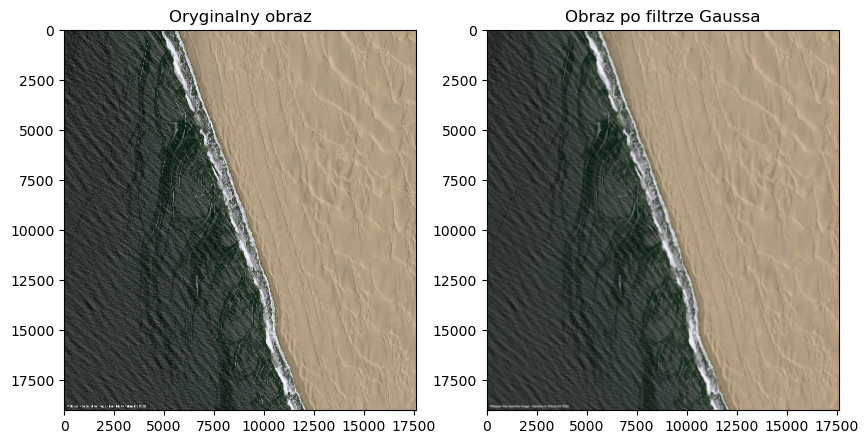

In [45]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Wczytaj obraz
image = cv2.imread('../satellite-images/Namibia.jpg')

# Zastosuj filtr Gaussa
# Parametry: (image, wielkość kernela, sigmaX)
gaussian_blurred = cv2.GaussianBlur(image, (1001, 1001), 20)

# Wyświetl oryginalny i przefiltrowany obraz
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Oryginalny obraz')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Obraz po filtrze Gaussa')
plt.imshow(cv2.cvtColor(gaussian_blurred, cv2.COLOR_BGR2RGB))

plt.show()


## TESTY FALEK

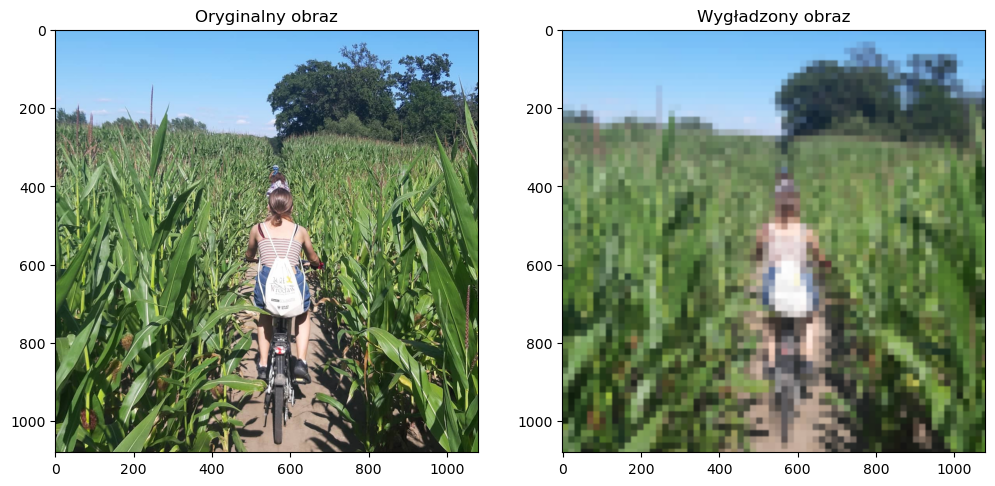

In [15]:
import cv2
import numpy as np
import pywt
from matplotlib import pyplot as plt

def wavelet_smoothing(image, wavelet='db1', level=1):
    coeffs = pywt.wavedec2(image, wavelet, level=level)
    coeffs_H = list(coeffs)  # make a copy of the list

    # Zero out the coefficients to perform smoothing
    coeffs_H[1:] = [(np.zeros_like(details[0]), np.zeros_like(details[1]), np.zeros_like(details[2])) for details in coeffs_H[1:]]

    # Reconstruct the image from the modified coefficients
    smoothed_image = pywt.waverec2(coeffs_H, wavelet)
    return smoothed_image

# Wczytaj obraz
image_path = '../test.jpg'
image = cv2.imread(image_path)

# Zmniejsz obraz dla transformacji (opcjonalnie, aby zaoszczędzić pamięć)
scale_factor = 0.25  # np. 0.25 oznacza zmniejszenie rozmiaru do 25% oryginalnego
small_image = cv2.resize(image, (0, 0), fx=scale_factor, fy=scale_factor)

# Rozdziel kanały kolorów
channels = cv2.split(small_image)

# Zastosuj wygładzanie falkowe na każdym kanale
smoothed_channels = [wavelet_smoothing(channel, wavelet='db1', level=2) for channel in channels]

# Połącz wygładzone kanały
smoothed_image = cv2.merge(smoothed_channels)

# Zwiększ obraz do oryginalnego rozmiaru (opcjonalnie)
smoothed_large_image = cv2.resize(smoothed_image, (image.shape[1], image.shape[0]))



# Wyświetl oryginalny i wygładzony obraz
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Oryginalny obraz')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Wygładzony obraz')
plt.imshow(cv2.cvtColor(smoothed_large_image.astype(np.uint8), cv2.COLOR_BGR2RGB))

plt.show()


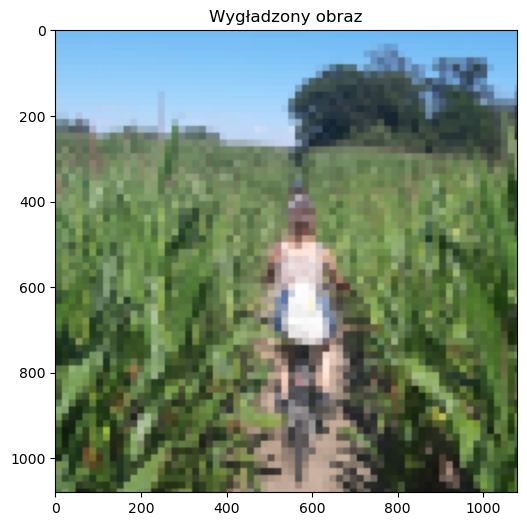

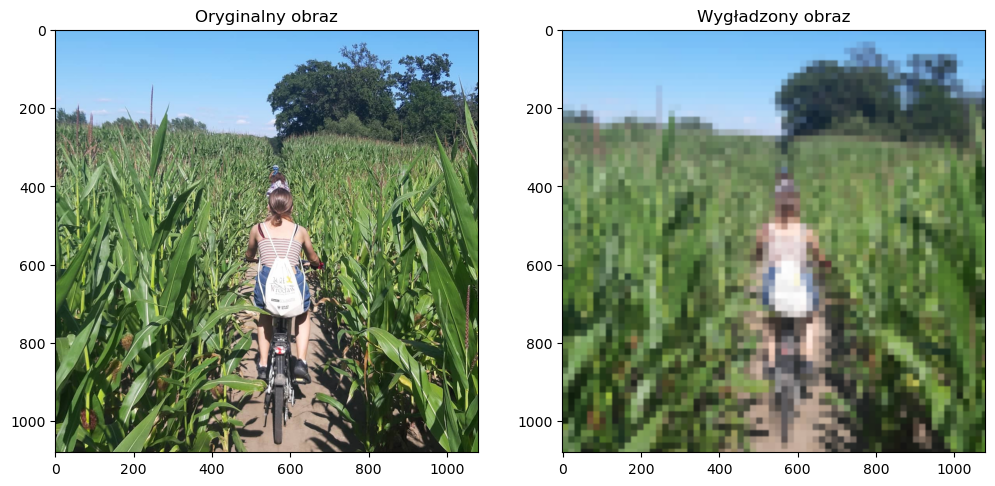

In [20]:
import cv2
import numpy as np
import pywt
from matplotlib import pyplot as plt

def wavelet_smoothing(image, wavelet='db1', level=1):
    coeffs = pywt.wavedec2(image, wavelet, level=level)
    coeffs_H = list(coeffs)  # make a copy of the list

    # Zero out the coefficients to perform smoothing
    coeffs_H[1:] = [(np.zeros_like(details[0]), np.zeros_like(details[1]), np.zeros_like(details[2])) for details in coeffs_H[1:]]

    # Reconstruct the image from the modified coefficients
    smoothed_image = pywt.waverec2(coeffs_H, wavelet)
    return smoothed_image

# Wczytaj obraz
image_path = '../test.jpg'
image = cv2.imread(image_path)

# Zmniejsz obraz dla transformacji (opcjonalnie, aby zaoszczędzić pamięć)
scale_factor = 0.25  # np. 0.25 oznacza zmniejszenie rozmiaru do 25% oryginalnego
small_image = cv2.resize(image, (0, 0), fx=scale_factor, fy=scale_factor)

# Rozdziel kanały kolorów
channels = cv2.split(small_image)

# Zastosuj wygładzanie falkowe na każdym kanale
smoothed_channels = [wavelet_smoothing(channel, wavelet='db1', level=2) for channel in channels]

# Połącz wygładzone kanały
smoothed_image = cv2.merge(smoothed_channels)



# Zwiększ obraz do oryginalnego rozmiaru (opcjonalnie)
smoothed_large_image = cv2.resize(smoothed_image, (image.shape[1], image.shape[0]))

plt.figure(figsize=(12, 6))
plt.title('Wygładzony obraz')
plt.imshow(cv2.cvtColor(smoothed_large_image.astype(np.uint8), cv2.COLOR_BGR2RGB))



gaussian_blurred = cv2.GaussianBlur(smoothed_large_image, (15, 15), 20)


# Wyświetl oryginalny i wygładzony obraz
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Oryginalny obraz')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Wygładzony obraz')
plt.imshow(cv2.cvtColor(smoothed_large_image.astype(np.uint8), cv2.COLOR_BGR2RGB))

plt.show()


/var/folders/88/pqr7tn3n40x03r8kcxv8n9ym0000gn/T/ipykernel_27094/2392375816.py:26: RuntimeWarning: divide by zero encountered in divide
  ndwi = (G.astype(float) - NIR.astype(float)) / (G + NIR)
/var/folders/88/pqr7tn3n40x03r8kcxv8n9ym0000gn/T/ipykernel_27094/2392375816.py:26: RuntimeWarning: invalid value encountered in divide
  ndwi = (G.astype(float) - NIR.astype(float)) / (G + NIR)


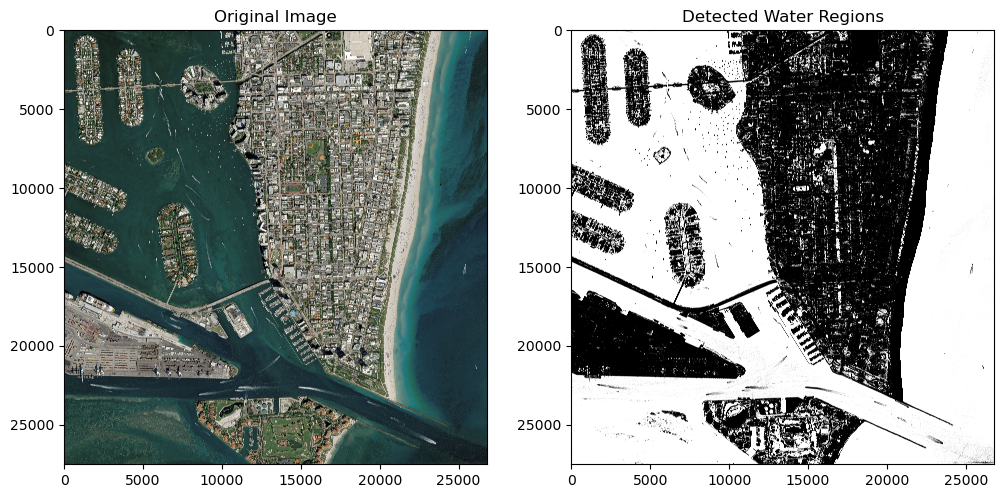

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_ndwi(image):
    """
    Calculate the Normalized Difference Water Index (NDWI) for a given satellite image.
    
    NDWI = (G - NIR) / (G + NIR)
    
    Parameters:
    image (numpy array): The satellite image in BGR format
    
    Returns:
    ndwi (numpy array): The calculated NDWI
    """
    # Split the image into B, G, R channels
    B, G, R = cv2.split(image)
    
    # Simulate NIR (Near Infrared) channel for the sake of this example
    # In real satellite images, NIR would be a separate band.
    # Here we just use the red channel as a placeholder for NIR.
    NIR = R
    
    # Calculate NDWI
    ndwi = (G.astype(float) - NIR.astype(float)) / (G + NIR)
    
    return ndwi

def detect_water(image, threshold=0.1):
    """
    Detect water in a satellite image using NDWI.
    
    Parameters:
    image (numpy array): The satellite image in BGR format
    threshold (float): The NDWI threshold to classify water
    
    Returns:
    water_mask (numpy array): The binary mask of detected water regions
    """
    ndwi = calculate_ndwi(image)
    
    # Apply threshold to create a binary mask of water regions
    water_mask = np.where(ndwi > threshold, 1, 0).astype(np.uint8)
    
    return water_mask

# Load the satellite image
image = cv2.imread('../satellite-images/Miami.jpg')

# Detect water in the image
water_mask = detect_water(image, threshold=0.1)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Detected Water Regions')
plt.imshow(water_mask, cmap='gray')

plt.show()


In [47]:
def dilate_image(binary_image, kernel_size=3, iterations=1):

    # Create a structuring element (kernel)
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    
    # Apply dilation
    dilated_image = cv2.dilate(binary_image, kernel, iterations=iterations)
    
    return dilated_image

In [48]:

def erode_image(binary_image, kernel_size=3, iterations=1):

    # Create a structuring element (kernel)
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    
    # Apply erosion
    eroded_image = cv2.erode(binary_image, kernel, iterations=iterations)
    
    return eroded_image

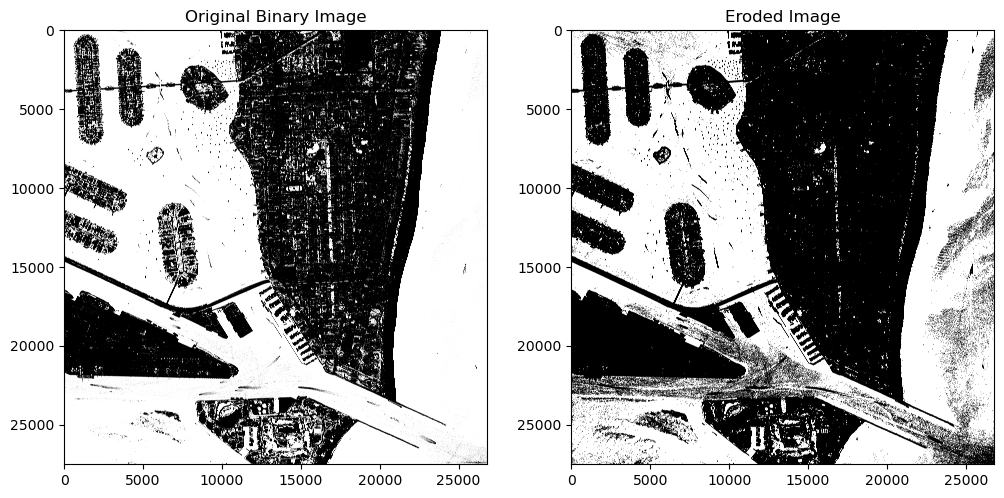

In [59]:
# Load a binary image
binary_image = water_mask

# Ensure the image is binary (0 or 255)
# _, binary_image = cv2.threshold(binary_image, 127, 255, cv2.THRESH_BINARY)

# Perform erosion

# eroded_image = dilate_image(binary_image, kernel_size=5, iterations=1)

# plt.figure(figsize=(12, 6))
# plt.title('First dilatation')
# plt.imshow(eroded_image, cmap='gray')

# eroded_image = erode_image(binary_image, kernel_size=10, iterations=2)
# eroded_image = dilate_image(eroded_image, kernel_size=20, iterations=3)

# for i in range(10):
#     eroded_image = erode_image(binary_image, kernel_size=15, iterations=1)
#     eroded_image = dilate_image(binary_image, kernel_size=2, iterations=1)

eroded_image = erode_image(binary_image, kernel_size=15, iterations=1)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Binary Image')
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Eroded Image')
plt.imshow(eroded_image, cmap='gray')

plt.show()


In [70]:
from PIL import Image, ImageDraw

def draw_grid(image, grid_size):

    # Tworzymy kopię obrazu, aby nie modyfikować oryginału
    imagePIL = Image.fromarray(image)
    image_with_grid = imagePIL.copy()
    draw = ImageDraw.Draw(image_with_grid)

    # Pobierz wymiary obrazu
    width, height = image_with_grid.size

    # Pobierz wymiary komórki siatki
    cell_width, cell_height = grid_size

    # Rysuj pionowe linie siatki
    for x in range(0, width, cell_width):
        draw.line((x, 0, x, height), fill='red')

    # Rysuj poziome linie siatki
    for y in range(0, height, cell_height):
        draw.line((0, y, width, y), fill='red')
    image_with_grid=np.array(image_with_grid)
    return image_with_grid


In [69]:
type(image)

numpy.ndarray

In [71]:
grid_size = (500, 500)  # size of each grid cell
image_with_grid = draw_grid(image,100)

# Display the result
plt.figure(figsize=(12, 6))

plt.title('Image with Grid')
plt.imshow(cv2.cvtColor(image_with_grid, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

TypeError: cannot unpack non-iterable int object